# Business Understanding

## Problem Statements

Rumusan masalah dari latar belakang di atas adalah:

1. Dari berbagai fitur yang ada, fitur mana yang paling berpengaruh terhadap kemungkinan seseorang mengidap penyakit jantung?
2. Bagaimana mengetahui kemungkinan seseorang terkena penyakit jantung berdasarkan riwayat fitur-fitur kesehatan yang tersedia?

## Goals

Tujuan dari proyek ini adalah:

1. Mengetahui fitur yang paling berkorelasi dengan kondisi penyakit jantung.
2. Membangun model machine learning yang dapat memprediksi apakah seseorang memiliki risiko penyakit jantung berdasarkan fitur-fitur yang tersedia.

## Solution Statements

1. Melakukan analisis eksplorasi data untuk memahami fitur-fitur yang memengaruhi penyakit jantung, menggunakan teknik visualisasi dan analisis statistik untuk mengidentifikasi hubungan antar fitur dan label (HeartDisease).
2. Menerapkan dan membandingkan beberapa algoritma machine learning untuk membangun model klasifikasi, dengan tujuan mendapatkan model yang memberikan akurasi terbaik dalam memprediksi penyakit jantung.

# Metodologi

Karena target variabel `HeartDisease` bersifat biner (1 = memiliki penyakit jantung, 0 = tidak), maka pendekatan yang digunakan adalah **klasifikasi**. Model klasifikasi akan dibuat untuk memprediksi kemungkinan seseorang memiliki penyakit jantung berdasarkan berbagai fitur yang tersedia dalam dataset.

# Metrik Evaluasi

Untuk mengevaluasi kinerja model klasifikasi, metrik-metrik berikut akan digunakan:

* **Accuracy**: Seberapa banyak prediksi yang benar dibandingkan dengan total prediksi.
* **Precision**: Proporsi prediksi positif yang benar-benar positif.
* **Recall**: Proporsi kasus positif yang berhasil dikenali oleh model.
* **F1-Score**: Harmonic mean dari precision dan recall.

# Data Understanding

## Deskripsi Dataset

Dataset ini berkaitan dengan prediksi penyakit jantung berdasarkan beberapa parameter kesehatan. Dataset ini merupakan gabungan dari lima sumber data yang berbeda dan memiliki total 918 observasi setelah dilakukan pembersihan data duplikat.

## Atribut Data:

| Fitur          | Deskripsi                                   |
| -------------- | ------------------------------------------- |
| Age            | Usia pasien (tahun)                         |
| Sex            | Jenis kelamin (M: Male, F: Female)          |
| ChestPainType  | Jenis nyeri dada (TA, ATA, NAP, ASY)        |
| RestingBP      | Tekanan darah istirahat (mm Hg)             |
| Cholesterol    | Kadar kolesterol (mg/dl)                    |
| FastingBS      | Gula darah puasa (> 120 mg/dl: 1, else: 0)  |
| RestingECG     | Hasil elektrokardiogram istirahat           |
| MaxHR          | Detak jantung maksimum yang dicapai         |
| ExerciseAngina | Angina yang dipicu oleh olahraga (Y/N)      |
| Oldpeak        | Depresi ST                                  |
| ST\_Slope      | Kemiringan segmen ST (Up, Flat, Down)       |
| HeartDisease   | Target: 1 = ada penyakit jantung, 0 = tidak |

## Sumber Dataset:

* Kaggle: [https://www.kaggle.com/fedesoriano/heart-failure-prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
* UCI Machine Learning Repository: [https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

## Ukuran Dataset

* Total observasi: 918
* Fitur: 11 (tidak termasuk target)
* Target: HeartDisease (biner)

Dataset ini sangat sesuai untuk diterapkan pada proyek klasifikasi karena memiliki jumlah sampel yang cukup, data kuantitatif, serta konteks yang kuat dalam bidang kesehatan.


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanaa17","key":"e58375a2eb832249aeb173326bbfee19"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install kaggle --upgrade

In [6]:
# Download dataset
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 32.7MB/s]


In [7]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [8]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis – Heart Failure Prediction Dataset


## Informasi Umum Dataset

Dataset ini terdiri dari **918 baris** dan **12 kolom** dengan berbagai atribut yang menggambarkan kondisi klinis pasien untuk mendeteksi kemungkinan penyakit jantung.

### Deskripsi Variabel

| Kolom           | Deskripsi |
|----------------|-----------|
| **Age**              | Usia pasien (dalam tahun) |
| **Sex**              | Jenis kelamin pasien (`M` = Laki-laki, `F` = Perempuan) |
| **ChestPainType**    | Tipe nyeri dada pasien (`TA`, `ATA`, `NAP`, `ASY`) |
| **RestingBP**        | Tekanan darah saat istirahat (mm Hg) |
| **Cholesterol**      | Kadar kolesterol serum (mg/dl) |
| **FastingBS**        | Gula darah puasa (`1` jika > 120 mg/dl, `0` jika tidak) |
| **RestingECG**       | Hasil elektrokardiogram saat istirahat (`Normal`, `ST`, `LVH`) |
| **MaxHR**            | Detak jantung maksimal saat berolahraga |
| **ExerciseAngina**   | Angina yang dipicu oleh olahraga (`Y` = Ya, `N` = Tidak) |
| **Oldpeak**          | Depresi ST (nilai numerik yang menunjukkan abnormalitas EKG) |
| **ST_Slope**         | Kemiringan segmen ST selama latihan (`Up`, `Flat`, `Down`) |
| **HeartDisease**     | Target prediksi (`1` = Mengalami penyakit jantung, `0` = Tidak) |

---

## Struktur Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Dari Dataset diatas, diketahui terdapat:**
- **6 kolom numerik (int64)**
- **1 kolom numerik desimal (float64)**
- **5 kolom kategorikal (object)**


## Cek Duplikasi dan Data Kosong

In [10]:
print(df.duplicated().sum())

0


In [11]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


- **Jumlah data duplikat: 0**
- **Jumlah missing values di setiap kolom:**


## Deskripsi Analisis

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:**

* **Count adalah jumlah sampel pada data.**
* **Mean adalah nilai rata-rata.**
* **Std adalah standar deviasi.**
* **Min yaitu nilai minimum setiap kolom.**
* **25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.**
* **50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).**
* **75% adalah kuartil ketiga.**
* **Max adalah nilai maksimum.**

## Cek Dimensi Data

In [13]:
df.shape

(918, 12)

**Dari Output diatas didapat informasi:**

| Jumlah Baris| Jumlah Kolom|
|--------------|------------|
|918           |          12|

## Menangani Outliers

Outlier ditangani menggunakan metode IQR dan diulangi beberapa kali hingga outlier benar-benar habis

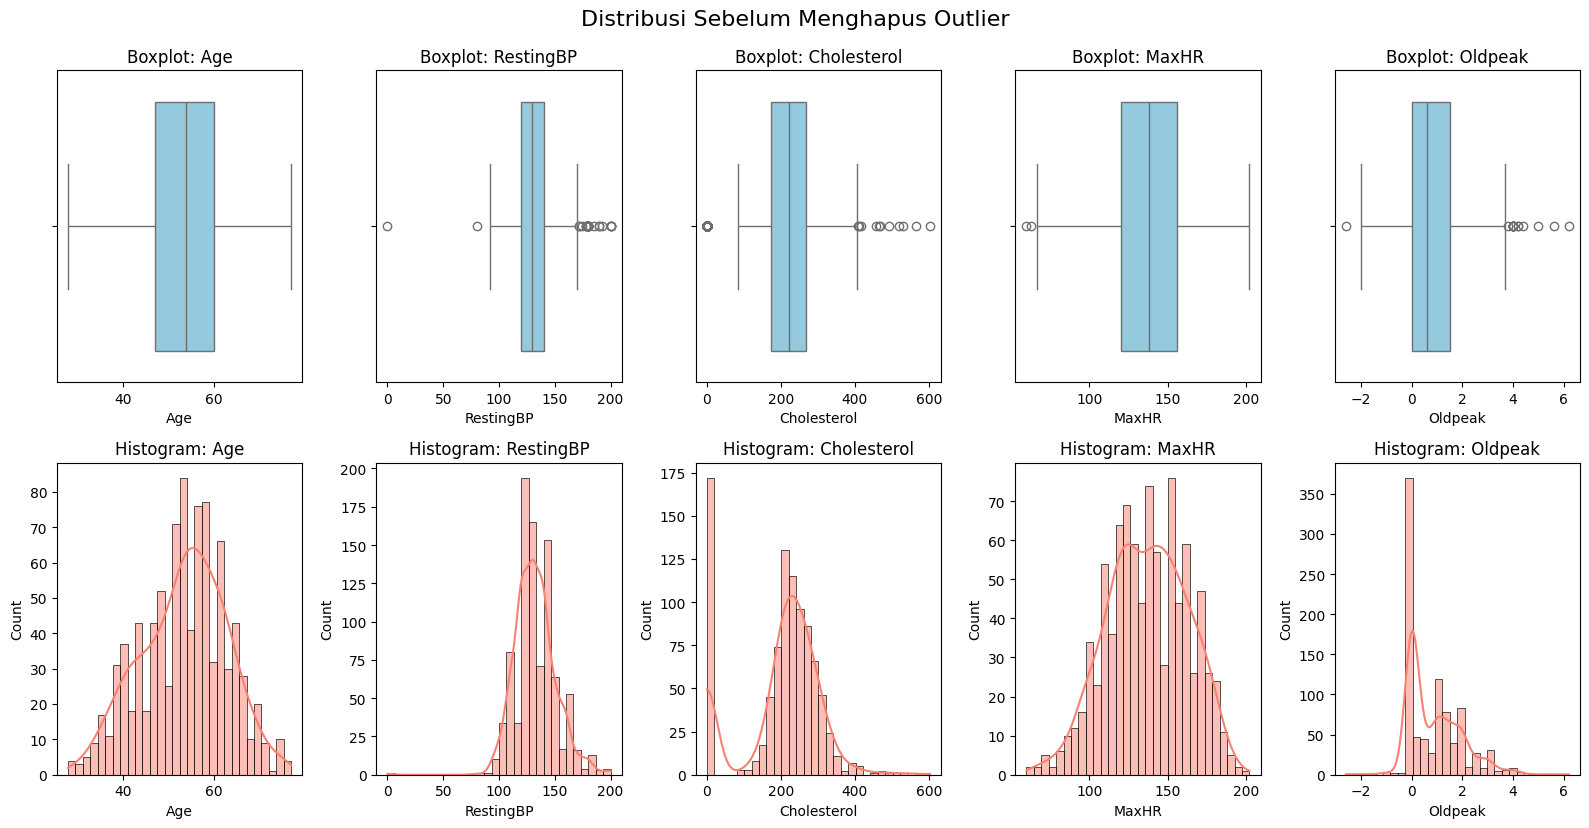

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang akan dianalisis
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Visualisasi awal: boxplot & histogram sebelum outlier dihapus
plt.figure(figsize=(16, 8))

# Boxplot
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot: {col}")

# Histogram
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), len(num_cols) + i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f"Histogram: {col}")

plt.tight_layout()
plt.suptitle("Distribusi Sebelum Menghapus Outlier", fontsize=16, y=1.03)
plt.show()


### Iterasi Pertama

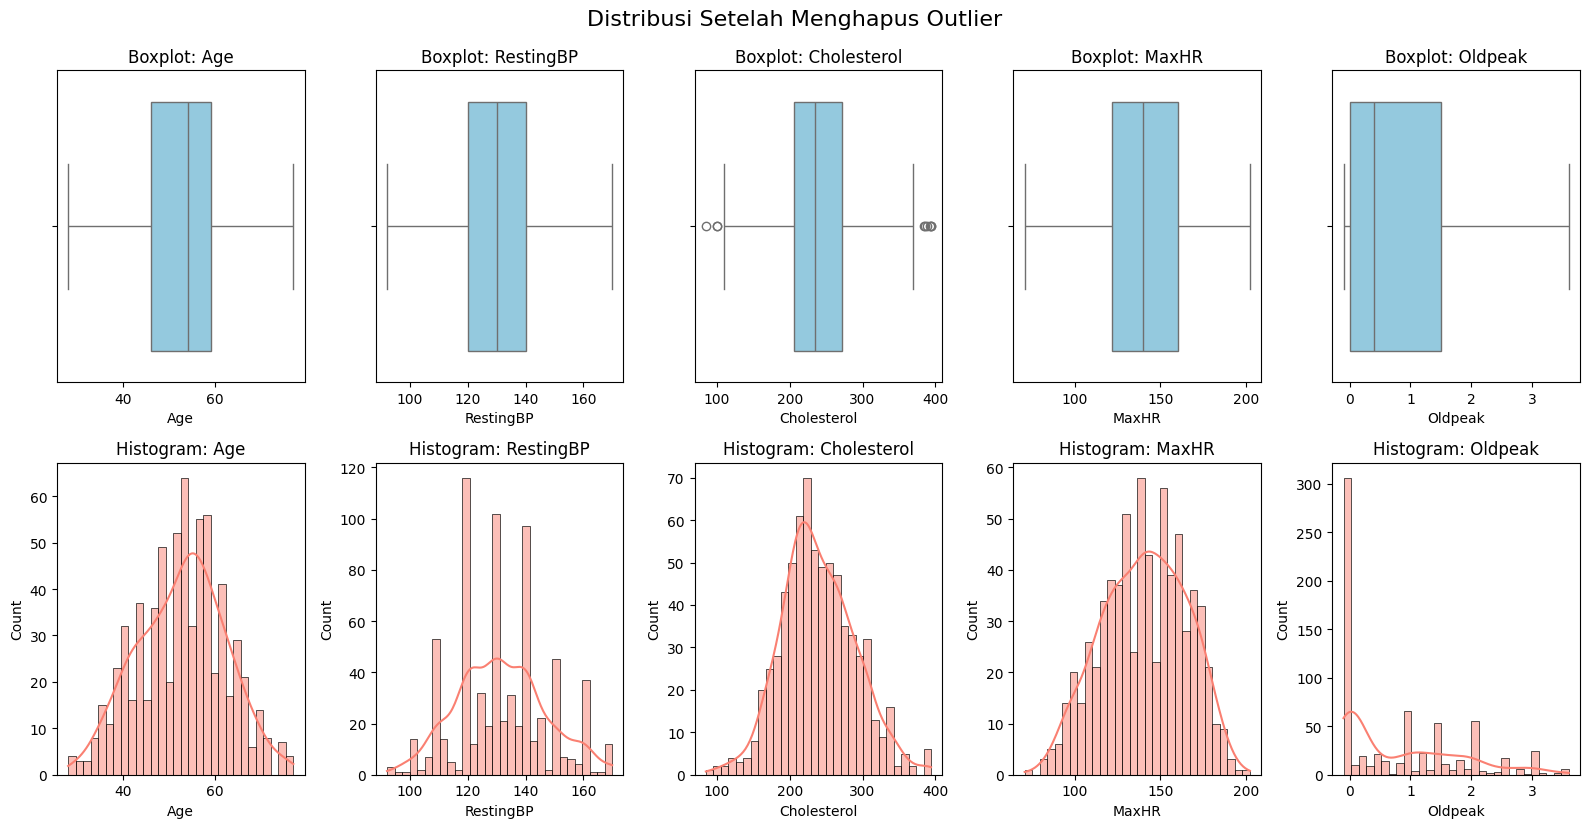

In [15]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Menghapus outlier dari setiap kolom numerik
for col in num_cols:
    df = remove_outliers(df, col)

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(16, 8))

# Boxplot setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot: {col}")

# Histogram setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), len(num_cols) + i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f"Histogram: {col}")

plt.tight_layout()
plt.suptitle("Distribusi Setelah Menghapus Outlier", fontsize=16, y=1.03)
plt.show()

### Iterasi Kedua

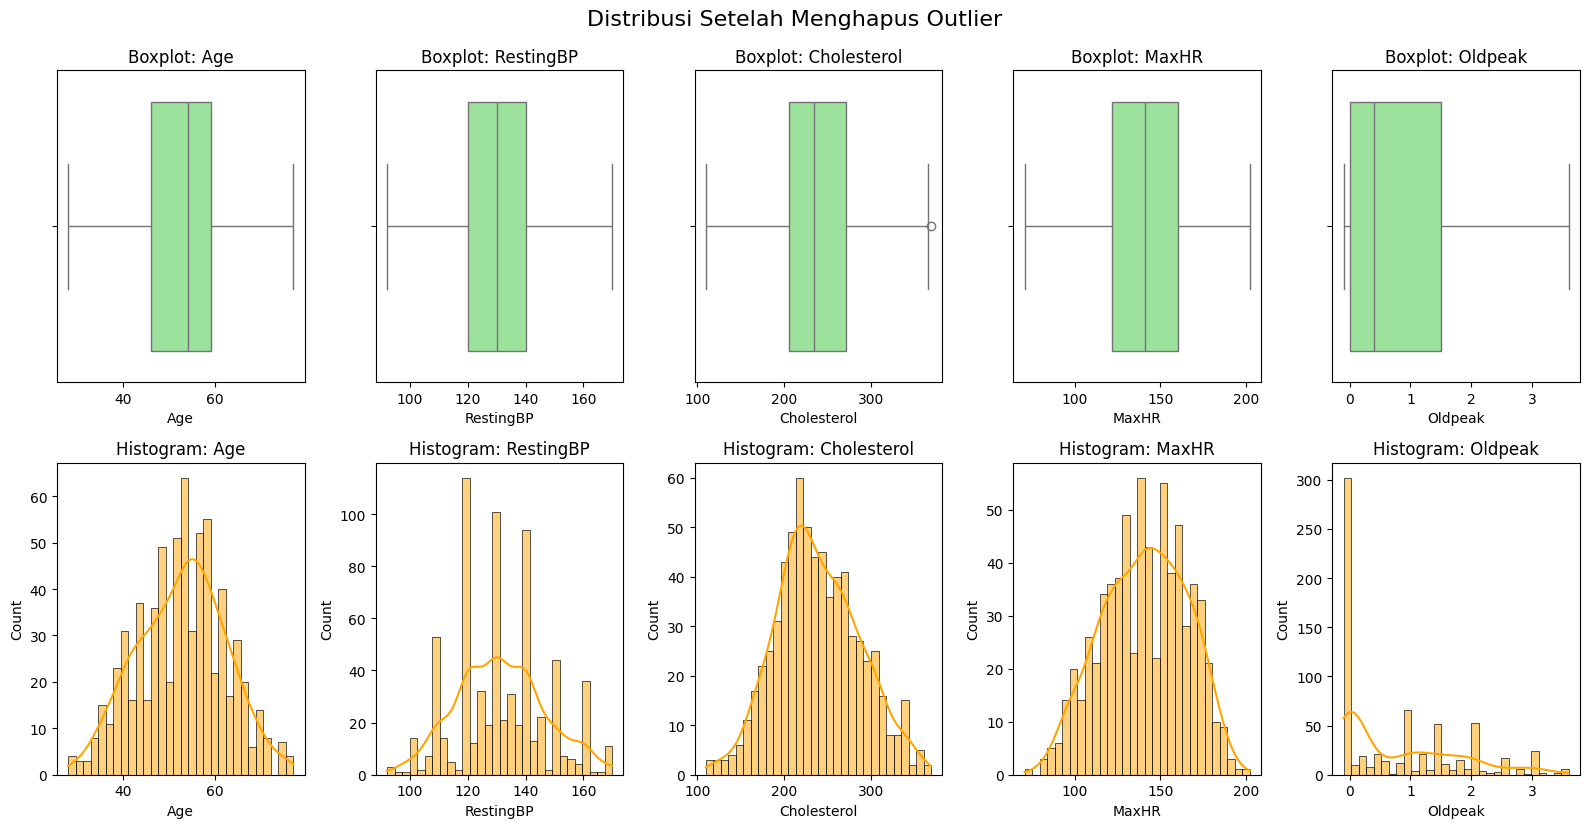

In [16]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Menghapus outlier dari setiap kolom numerik
for col in num_cols:
    df = remove_outliers(df, col)

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(16, 8))

# Boxplot setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot: {col}")

# Histogram setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), len(num_cols) + i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f"Histogram: {col}")

plt.tight_layout()
plt.suptitle("Distribusi Setelah Menghapus Outlier", fontsize=16, y=1.03)
plt.show()

### Iterasi Ketiga

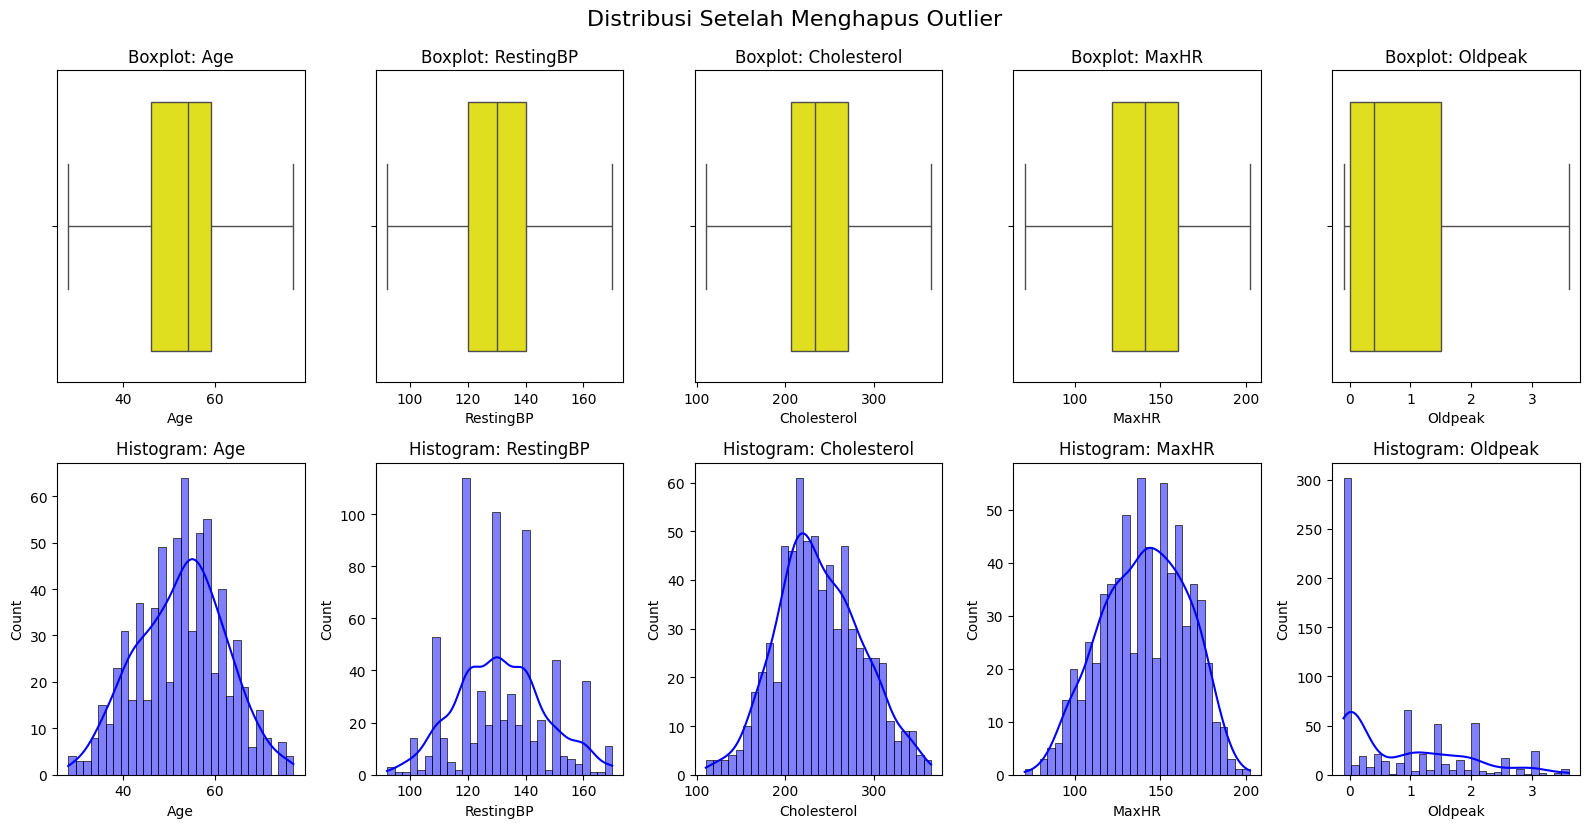

In [17]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Menghapus outlier dari setiap kolom numerik
for col in num_cols:
    df = remove_outliers(df, col)

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(16, 8))

# Boxplot setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i + 1)
    sns.boxplot(x=df[col], color='yellow')
    plt.title(f"Boxplot: {col}")

# Histogram setelah outlier dihapus
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), len(num_cols) + i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram: {col}")

plt.tight_layout()
plt.suptitle("Distribusi Setelah Menghapus Outlier", fontsize=16, y=1.03)
plt.show()

**Setelah dilakukan tiga kali pengulangan, barulah hasil dataset terlihat benar-benar bersih**

In [43]:
df.shape

(691, 12)

Setelah dilakukan pengurangan pada saat menangani outlier, jumlah data berkurang menjadi 691 baris dengan 12 kolom

## Univariate Analisis

In [18]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Analisis Fitur Kategorikal

**Fitur Sex**

     jumlah sampel  persentase (%)
Sex                               
M              526            76.1
F              165            23.9


<Axes: title={'center': 'Sex'}, xlabel='Sex'>

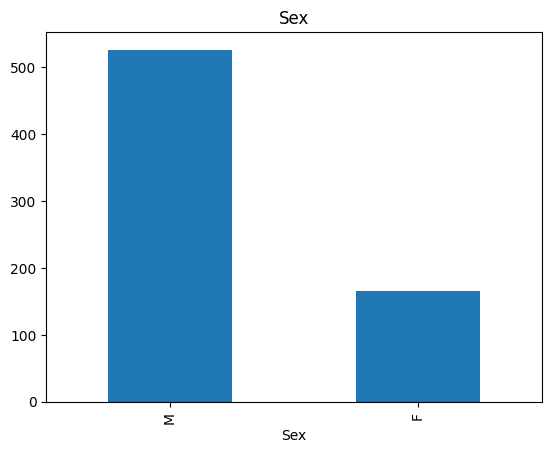

In [19]:
feature = 'Sex'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_sex = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_sex)
count.plot(kind='bar', title=feature)

Kesimpulan: Sebagian besar partisipan adalah laki-laki (M), dengan proporsi lebih dari 70%.

**Fitur: ChestPainType**

               jumlah sampel  persentase (%)
ChestPainType                               
ASY                      331            47.9
NAP                      163            23.6
ATA                      158            22.9
TA                        39             5.6


<Axes: title={'center': 'ChestPainType'}, xlabel='ChestPainType'>

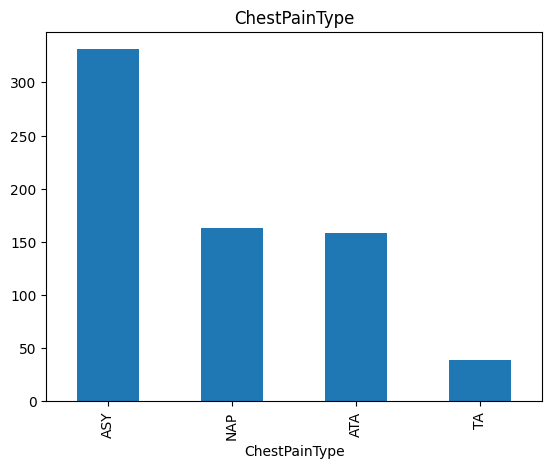

In [20]:
feature = 'ChestPainType'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_cpt = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_cpt)
count.plot(kind='bar', title=feature)


Kesimpulan: Jenis nyeri dada ASY paling sering muncul, diikuti oleh NAP dan ATA dan TA.

**Feature: FastingBS**

           jumlah sampel  persentase (%)
FastingBS                               
0                    579            83.8
1                    112            16.2


<Axes: title={'center': 'FastingBS'}, xlabel='FastingBS'>

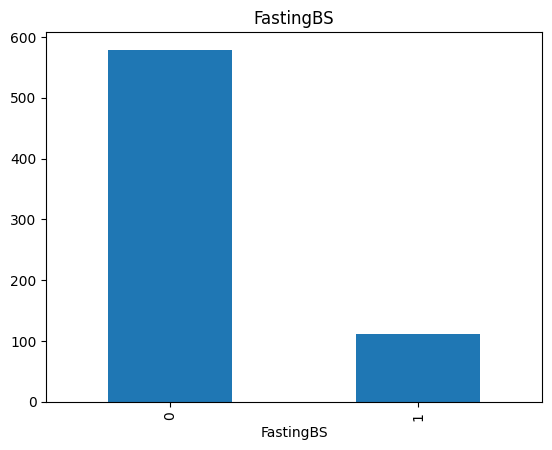

In [21]:
feature = 'FastingBS'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_fb = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_fb)
count.plot(kind='bar', title=feature)


Kesimpulan: Lebih dari 80% partisipan memiliki gula darah puasa

**Fitur: RestingECG**

            jumlah sampel  persentase (%)
RestingECG                               
Normal                416            60.2
LVH                   162            23.4
ST                    113            16.4


<Axes: title={'center': 'RestingECG'}, xlabel='RestingECG'>

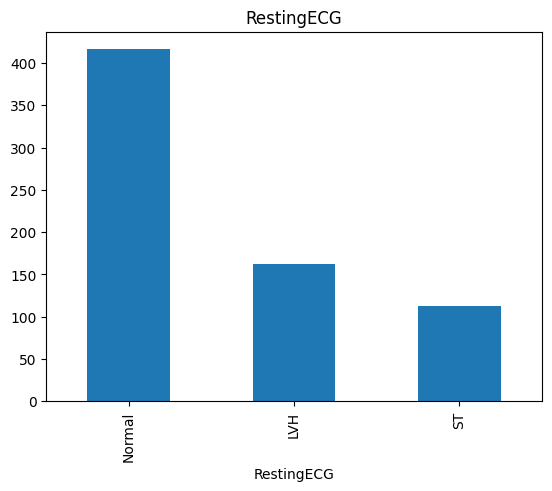

In [22]:
feature = 'RestingECG'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_fb = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_fb)
count.plot(kind='bar', title=feature)


Kesipulan: Sebagian besar partisipan memiliki hasil EKG normal saat istirahat. Namun, sekitar 40% partisipan menunjukkan kelainan, baik dalam bentuk LVH atau kelainan gelombang ST, yang bisa mengindikasikan potensi masalah jantung.

**Fitur: ExerciseAngina**

                jumlah sampel  persentase (%)
ExerciseAngina                               
N                         434            62.8
Y                         257            37.2


<Axes: title={'center': 'ExerciseAngina'}, xlabel='ExerciseAngina'>

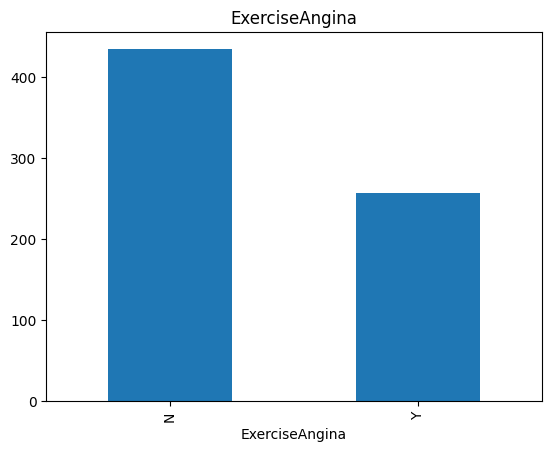

In [23]:
feature = 'ExerciseAngina'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_fb = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_fb)
count.plot(kind='bar', title=feature)

Kesimpulan: Mayoritas pasien tidak mengalami angina selama aktivitas fisik. Namun, 37.2% partisipan mengalami angina saat berolahraga, yang merupakan indikator penting dalam mendeteksi penyakit jantung.

**Fitur: ST_Slope**

          jumlah sampel  persentase (%)
ST_Slope                               
Up                  334            48.3
Flat                325            47.0
Down                 32             4.6


<Axes: title={'center': 'ST_Slope'}, xlabel='ST_Slope'>

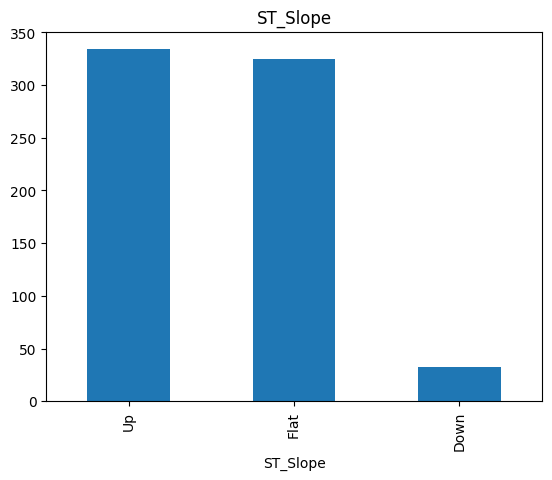

In [24]:
feature = 'ST_Slope'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_sex = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df_sex)
count.plot(kind='bar', title=feature)

Kesimpulan: Hampir setengah dari pasien memiliki ST Slope naik (normal), tetapi sekitar 47% menunjukkan ST Slope datar yang dapat mengindikasikan stres atau iskemia pada jantung. Sementara itu, penurunan ST Slope meskipun hanya 4.6%, merupakan indikator yang paling mengkhawatirkan dalam mendeteksi potensi penyakit jantung serius.

### Analisis Fitur Numerikal

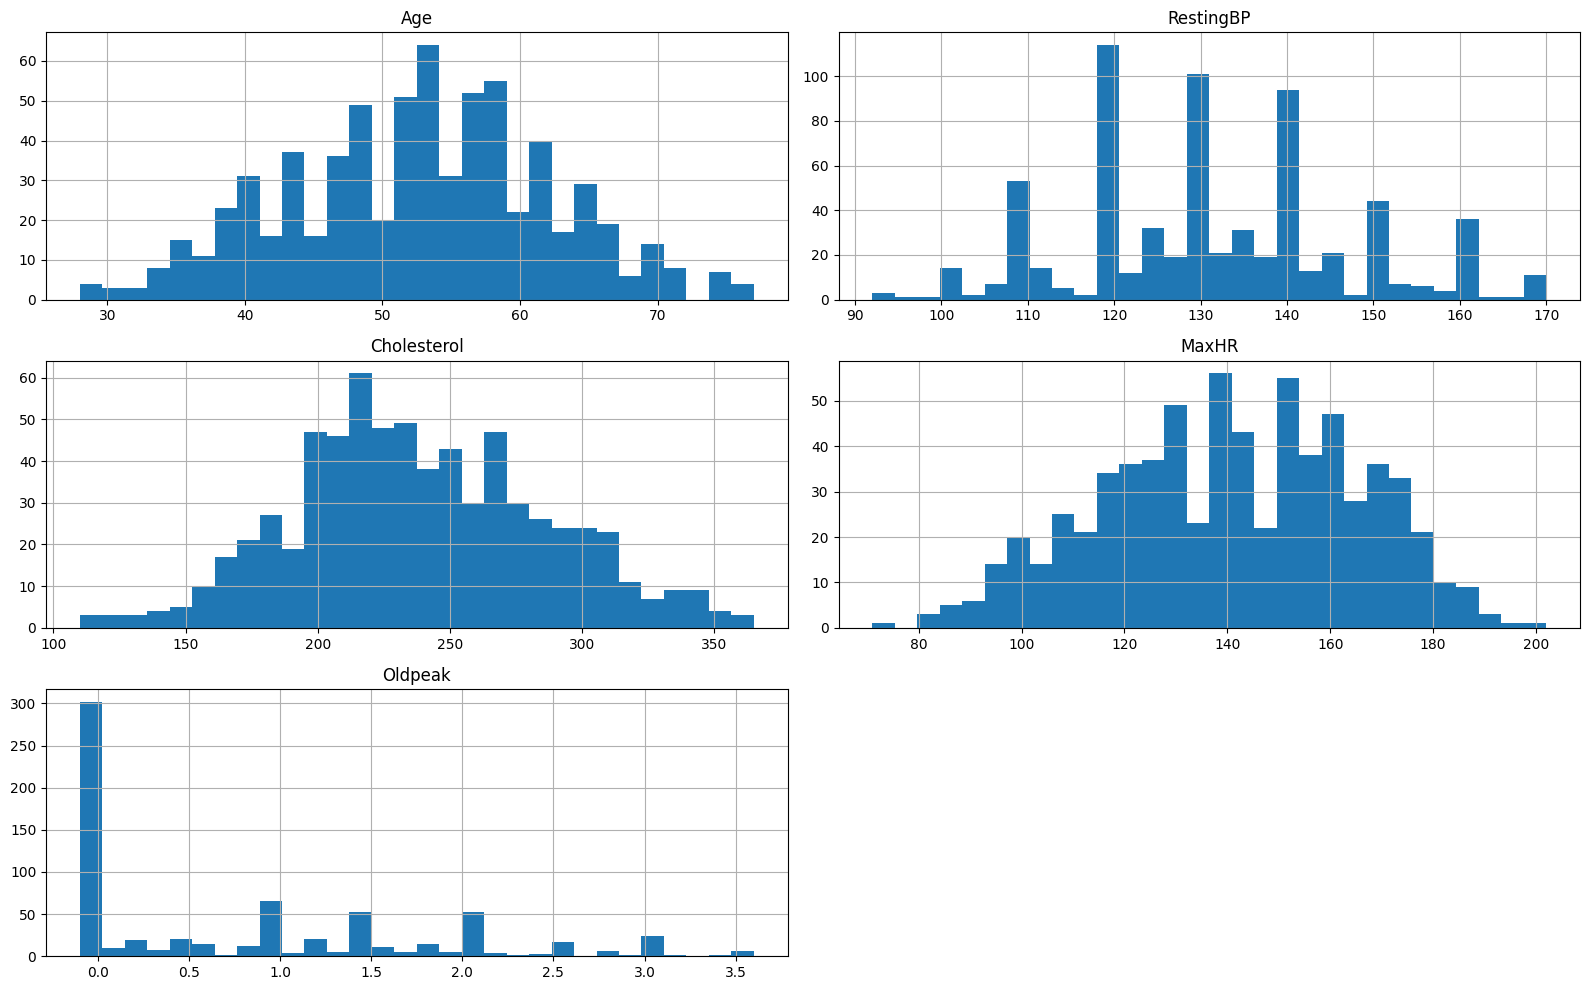

In [26]:
df[numerical_features].hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()

📊 **Kesimpulan Histogram Fitur Numerik**

Berdasarkan histogram pada masing-masing fitur numerik, diperoleh beberapa insight berikut:

1. **Age**
- Distribusi usia pasien membentuk kurva hampir simetris (mendekati normal).
- Usia terbanyak berada di rentang 50–60 tahun, menunjukkan dominasi pasien paruh baya.
- Distribusi usia cenderung merata, tanpa outlier mencolok.

2. **RestingBP (Tekanan Darah Istirahat)**
- Terdapat lonjakan signifikan pada nilai tertentu seperti 120, 130, dan 140 mmHg.
- Hal ini dapat mengindikasikan penggunaan nilai default atau pembulatan.
- Distribusi tidak merata, sehingga analisis lebih lanjut perlu dilakukan.

3. **Cholesterol**
- Distribusi kolesterol cenderung miring ke kanan (right-skewed).
- Sebagian besar nilai kolesterol berada pada rentang 200–250 mg/dL.
- Terdapat beberapa nilai ekstrim (outlier) di atas 350 mg/dL.

4. **MaxHR (Detak Jantung Maksimal)**
- Distribusi mendekati normal.
- Mayoritas pasien memiliki detak jantung maksimal antara 130–170 bpm.
- Tidak ditemukan outlier yang signifikan.

5. **Oldpeak (ST Depression)**
- Distribusi sangat miring ke kanan (right-skewed).
- Sebagian besar pasien memiliki nilai 0, menunjukkan tidak ada depresi segmen ST.
- Nilai tinggi pada fitur ini dapat mengindikasikan kondisi jantung yang serius.

---

**Kesimpulan Umum**
- Sebagian besar fitur numerik memiliki distribusi simetris, kecuali `RestingBP` dan `Oldpeak`.
- Fitur `Oldpeak` menunjukkan banyak nilai nol, menandakan dominasi pasien tanpa gejala ST depression.
- Nilai-nilai `RestingBP` perlu ditinjau lebih lanjut karena distribusinya tidak alami dan memiliki lonjakan yang mencurigakan.


## Multivariate Analisis

### Fitur Kategorikal vs Target

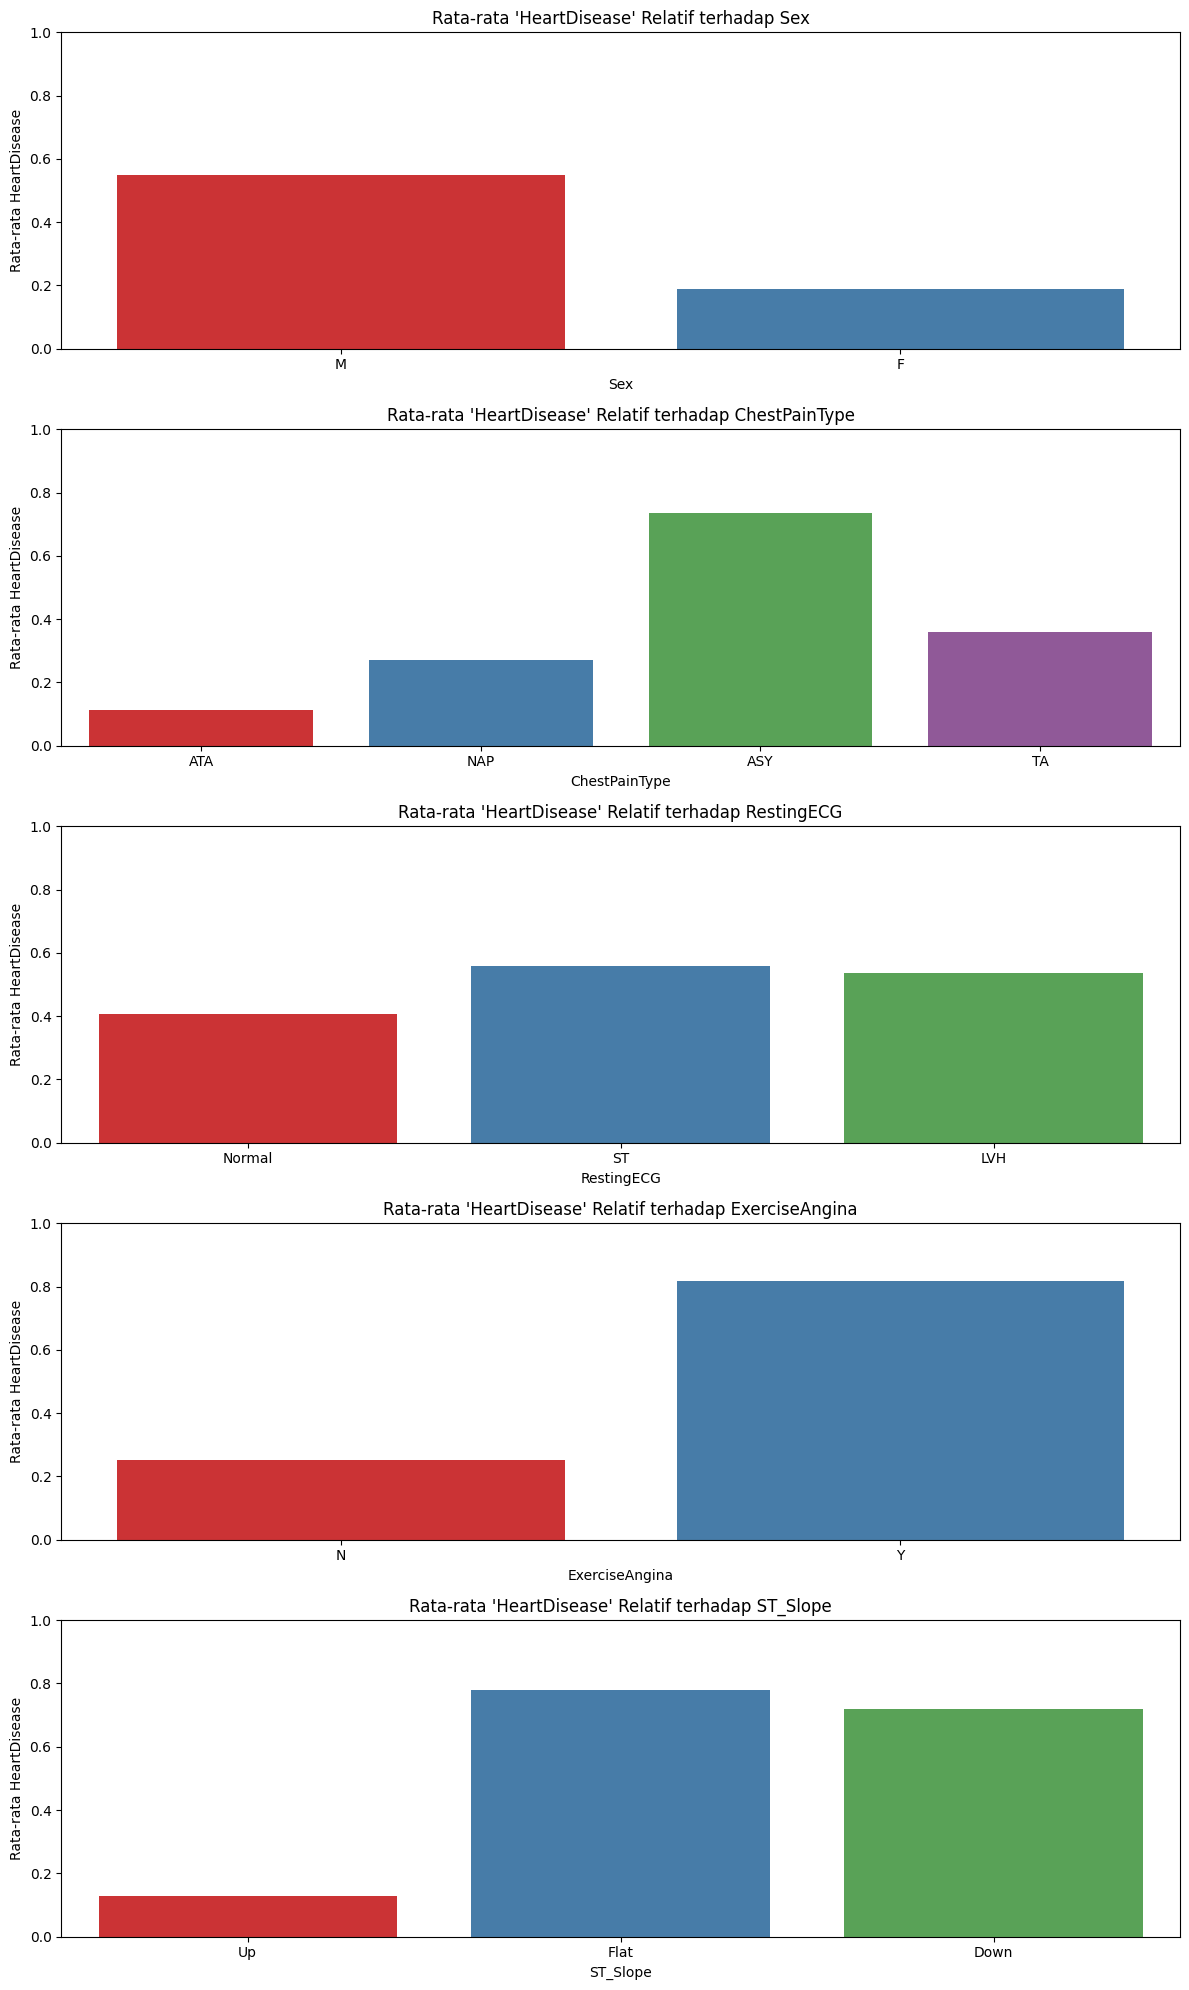

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_heartdisease_by_category(df):
    kategorikal = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

    plt.figure(figsize=(12, len(kategorikal)*4))
    for i, kolom in enumerate(kategorikal, 1):
        ax = plt.subplot(len(kategorikal), 1, i)
        sns.barplot(data=df, x=kolom, y='HeartDisease', ci=None, ax=ax, palette='Set1')
        ax.set_title(f"Rata-rata 'HeartDisease' Relatif terhadap {kolom}", fontsize=12)
        ax.set_ylim(0, 1)
        ax.set_ylabel('Rata-rata HeartDisease')
        ax.set_xlabel(kolom)

    plt.tight_layout()
    plt.show()

plot_avg_heartdisease_by_category(df)

**Kesimpulan EDA Bivariate (Fitur Kategori vs HeartDisease)**

1. Sex vs HeartDisease
- Laki-laki (`M`) memiliki proporsi penyakit jantung yang lebih tinggi dibanding perempuan (`F`).
- Artinya, jenis kelamin laki-laki berpotensi lebih rentan terhadap penyakit jantung dalam data ini.

2. ChestPainType vs HeartDisease
- Tipe nyeri dada ASY (Asymptomatic) paling sering dikaitkan dengan penyakit jantung.
- Tipe ATA memiliki proporsi penyakit jantung paling rendah.
- Menunjukkan jenis nyeri dada sangat berkaitan dengan risiko penyakit jantung.

3. RestingECG vs HeartDisease
- Pasien dengan hasil ECG bertipe ST dan LVH memiliki proporsi HeartDisease lebih tinggi dibandingkan tipe Normal.
- Hasil pemeriksaan ECG bisa menjadi indikator penting dalam mendeteksi penyakit jantung.

4. ExerciseAngina vs HeartDisease
- Pasien dengan angina saat olahraga (`Y`) jauh lebih berisiko memiliki penyakit jantung dibanding yang tidak (`N`).
- Korelasi ini sangat kuat dan jelas terlihat di grafik.

5. ST_Slope vs HeartDisease
- Pasien dengan slope Flat dan Down memiliki proporsi penyakit jantung lebih tinggi dibanding slope Up.
- Bentuk kemiringan ST segment adalah fitur penting dalam diagnosis jantung.

---

Interpretasi Umum
- Banyak fitur kategori dalam dataset ini memiliki korelasi yang jelas dan kuat terhadap penyakit jantung.
- Fitur seperti ChestPainType, ExerciseAngina, dan ST_Slope sangat membantu dalam memprediksi HeartDisease.


### Fitur Numerikal vs Target

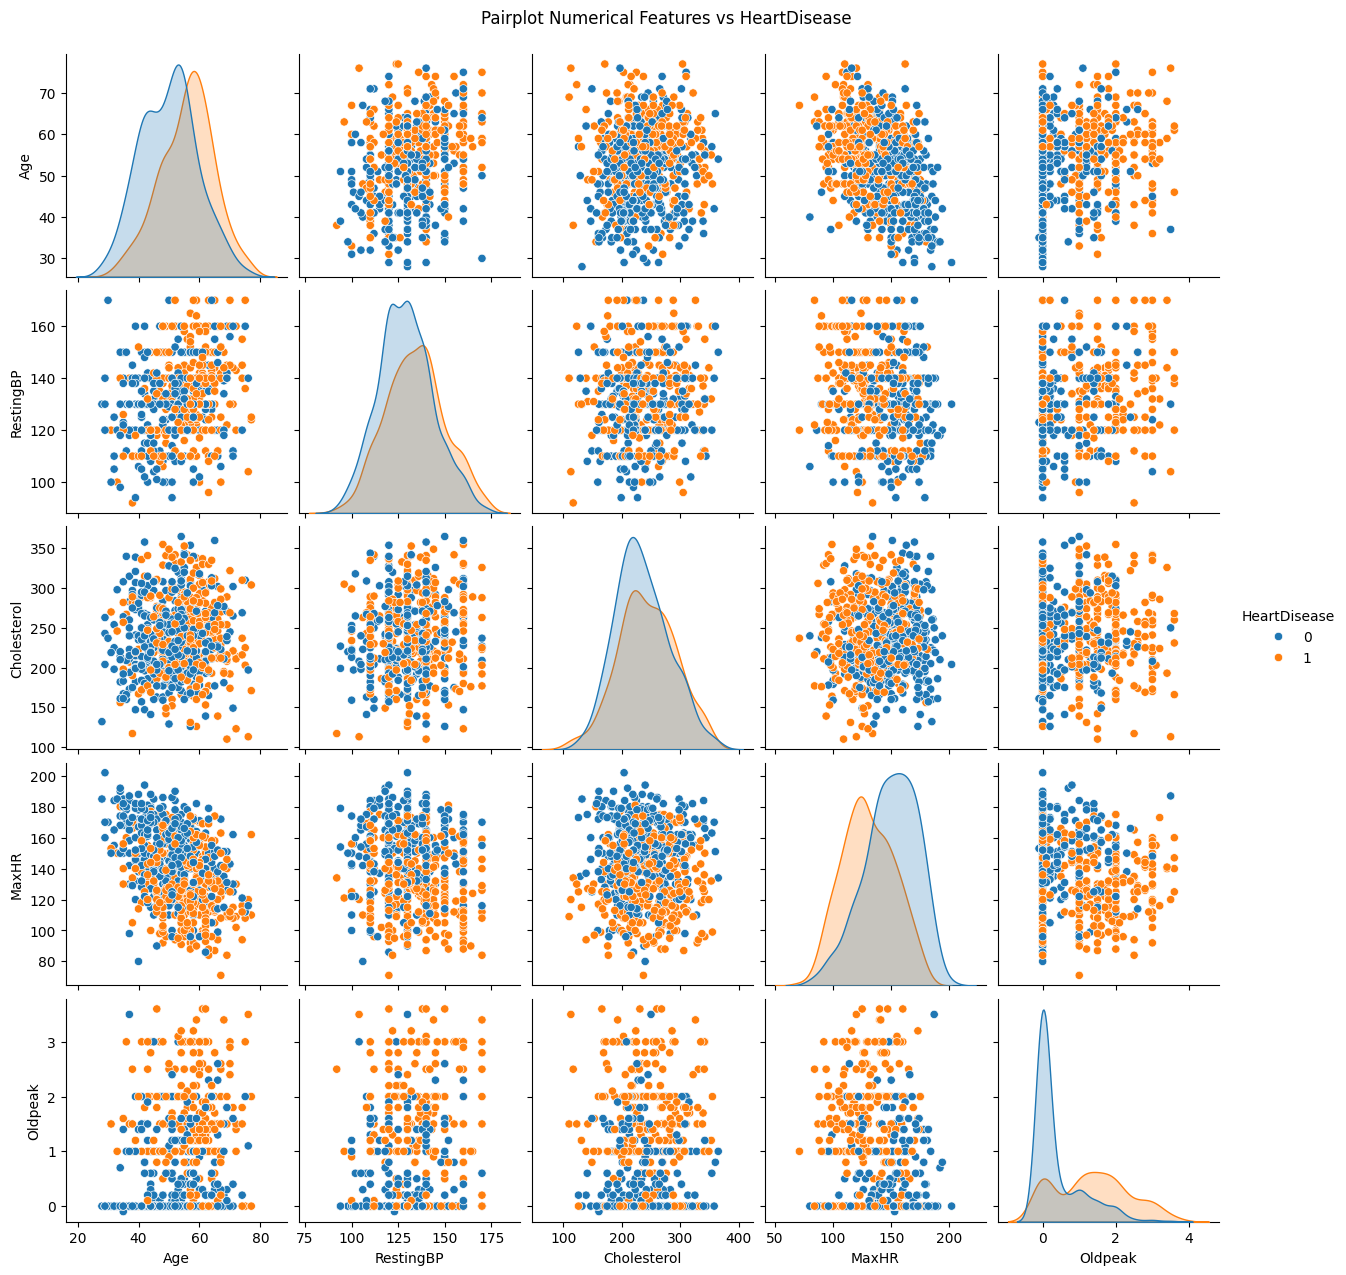

In [37]:
# Pairplot untuk melihat distribusi fitur numerik berdasarkan target
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

import seaborn as sns
sns.pairplot(df[num_features + ['HeartDisease']], hue='HeartDisease', diag_kind='kde')
plt.suptitle("Pairplot Numerical Features vs HeartDisease", y=1.02)
plt.show()


**Kesimpulan dari Pairplot Numerical Features vs HeartDisease**

Berdasarkan visualisasi pairplot terhadap fitur numerik dan target `HeartDisease`, diperoleh insight sebagai berikut:

1. Age vs HeartDisease
- Distribusi usia antara pasien dengan dan tanpa penyakit jantung terlihat mirip.
- Namun, pasien dengan `HeartDisease = 1` cenderung berada pada rentang usia 50–65 tahun.
- Korelasi antara `Age` dan `HeartDisease` tampak lemah.

2. RestingBP vs HeartDisease
- Penyebaran nilai `RestingBP` (tekanan darah istirahat) cukup acak.
- Tidak terlihat adanya pola hubungan yang jelas antara tekanan darah dan `HeartDisease`.

3. Cholesterol vs HeartDisease
- Distribusi kolesterol untuk penderita dan non-penderita tampak tumpang tindih.
- Tidak menunjukkan adanya pengaruh signifikan terhadap `HeartDisease`.

4. MaxHR vs HeartDisease
- Terlihat pola yang cukup jelas bahwa pasien dengan `HeartDisease = 1` memiliki MaxHR yang lebih rendah.
- Sebaliknya, pasien tanpa penyakit jantung cenderung memiliki MaxHR lebih tinggi.
- MaxHR berpotensi menjadi fitur prediktor yang penting.

5. Oldpeak vs HeartDisease
- Nilai `Oldpeak` yang tinggi sering diasosiasikan dengan `HeartDisease = 1`.
- Menunjukkan korelasi positif yang cukup kuat terhadap penyakit jantung.


### Matriks Korelasi

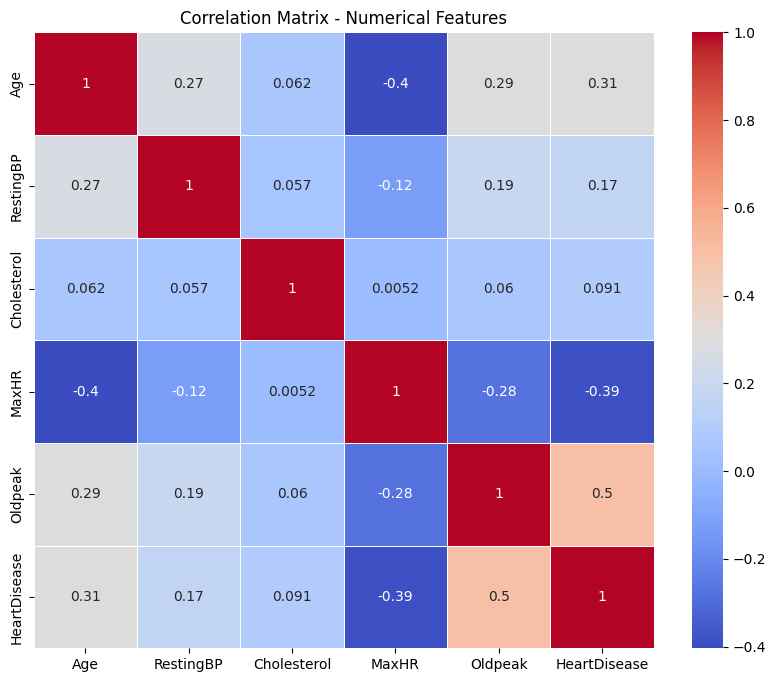

In [38]:
plt.figure(figsize=(10, 8))
corr = df[num_features + ['HeartDisease']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix - Numerical Features")
plt.show()


Berdasarkan matriks korelasi untuk fitur numerik yang ditampilkan:

* Oldpeak memiliki korelasi tertinggi dengan HeartDisease sebesar 0.50. Ini menunjukkan bahwa semakin tinggi nilai Oldpeak (depresi ST yang diinduksi oleh olahraga relatif terhadap kondisi istirahat), semakin besar kemungkinan seseorang mengalami penyakit jantung.

* MaxHR (Maximum Heart Rate) memiliki korelasi negatif sebesar -0.39 dengan HeartDisease, yang mengindikasikan bahwa individu dengan detak jantung maksimum yang lebih rendah saat olahraga cenderung memiliki risiko penyakit jantung yang lebih tinggi. Hal ini cukup logis karena detak jantung maksimum yang rendah dapat mencerminkan kebugaran jantung yang menurun.

* Age juga menunjukkan korelasi positif terhadap HeartDisease sebesar 0.31, yang berarti semakin tua usia seseorang, semakin besar kemungkinan mengalami penyakit jantung. Ini sejalan dengan fakta bahwa risiko penyakit jantung meningkat seiring bertambahnya usia.

* Sementara itu, RestingBP memiliki korelasi positif lemah sebesar 0.17 terhadap HeartDisease, yang menunjukkan bahwa tekanan darah saat istirahat sedikit berpengaruh terhadap risiko penyakit jantung.

* Cholesterol memiliki korelasi yang sangat lemah dengan HeartDisease sebesar 0.091, sehingga tidak terlalu signifikan dalam memprediksi keberadaan penyakit jantung berdasarkan data ini.

* Selain itu, terdapat hubungan yang cukup menarik antar fitur numerik lainnya. Misalnya, MaxHR memiliki korelasi negatif dengan Age sebesar -0.40, yang berarti semakin tua usia seseorang, semakin rendah detak jantung maksimum yang bisa dicapai—sesuatu yang sangat wajar secara fisiologis.

* Oldpeak juga berkorelasi negatif dengan MaxHR sebesar -0.28, yang menunjukkan bahwa peningkatan depresi ST (Oldpeak) cenderung diikuti oleh penurunan MaxHR.

* Secara keseluruhan, fitur-fitur seperti Oldpeak, MaxHR, dan  merupakan indikator penting terhadap risiko penyakit jantung dalam data ini, sementara fitur seperti Cholesterol dan RestingBP tampaknya memberikan pengaruh yang lebih kecil.


In [44]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Preparation

Teknik Data preparation yang dilakukan terdiri dari:

* Label encoding
* Standardization
* Train-test-split data

## Encoding Fitur Kategorik

Encoding pada fitur Kategorik dilakukan menggunakan LabelEncoder

In [46]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Splitting Data

Splitting data dilakukan dengan perbandingan 80:20, yaitu 80 pada training dan 20 pada testing

In [47]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling Numerik

Fitur Numerik di scaling menggunakan StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

# Fit dan transform
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Development

Pada tahapan model development ini algoritma machine learning yang digunakan terdiri dari:

* KNN
* SVM
* Random Forest


## Model Development KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Parameter KNN:

* n_neighbors=5: jumlah tetangga terdekat yang akan digunakan untuk menentukan kelas. Artinya, KNN akan melihat 5 data terdekat dari data uji dan memilih mayoritas kelas sebagai prediksi.

## Model Development SVM

In [58]:
from sklearn.svm import SVC

# Model SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

Parameter SVM

* kernel='rbf': Menggunakan Radial Basis Function, kernel default yang cocok untuk data yang tidak linear. Kernel ini mengubah ruang input ke ruang berdimensi lebih tinggi untuk memisahkan data.

* C=1.0: Parameter regularisasi. Nilai kecil (misal 0.1) membuat model lebih toleran terhadap kesalahan (mencegah overfitting), sedangkan nilai besar (misal 10) membuat model lebih ketat meminimalkan kesalahan klasifikasi (bisa overfit).

* gamma='scale': Parameter untuk kernel RBF. scale artinya dihitung otomatis berdasarkan jumlah fitur dan variansi data. Gamma menentukan pengaruh satu sampel, semakin besar gamma semakin sempit jangkauan pengaruhnya (bisa overfit jika terlalu besar).

* probability=True: Mengaktifkan prediksi probabilistik (misalnya jika ingin pakai ROC-AUC atau .predict_proba()), walau ini bisa memperlambat training sedikit.



## Model Development Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, criterion="gini")
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Parameter Random Forest:

* random_state=42: Untuk memastikan hasil yang reproducible (hasil sama setiap kali dijalankan).
* n_estimators=100:	Jumlah pohon keputusan yang dibangun dalam hutan. Makin banyak pohn maka semakin stabil, tapi lebih lambat.
* max_depth=None: Kedalaman maksimum dari tiap pohon. None berarti pohon akan terus tumbuh sampai semua daun murni.
* criterion="gini":	Fungsi yang digunakan untuk mengukur kualitas split pada setiap node.

# Evaluasi Model

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred = svm.predict(X_test)

# Evaluasi KNN
print("Evaluasi KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluasi SVM
print("\n\nEvaluasi SVM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluasi Random Forest
print("\n\nEvaluasi Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Evaluasi KNN
Accuracy: 0.8129496402877698
Confusion Matrix:
 [[67 11]
 [15 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        78
           1       0.81      0.75      0.78        61

    accuracy                           0.81       139
   macro avg       0.81      0.81      0.81       139
weighted avg       0.81      0.81      0.81       139



Evaluasi SVM
Accuracy: 0.8633093525179856
Confusion Matrix:
 [[67 11]
 [ 8 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        78
           1       0.83      0.87      0.85        61

    accuracy                           0.86       139
   macro avg       0.86      0.86      0.86       139
weighted avg       0.86      0.86      0.86       139



Evaluasi Random Forest
Accuracy: 0.8776978417266187
Confusion Matrix:
 [[69  9]
 [ 8 53]]
Classification Report:
               preci

**Kesimpulan**

1.  Forest menunjukkan performa terbaik dengan akurasi tertinggi (87.8%) dan metrik precision, recall, serta f1-score yang paling konsisten tinggi di kedua kelas.

2. SVM juga memberikan hasil yang sangat baik dengan akurasi 86.3%, sedikit di bawah Random Forest, dan performa seimbang di kedua kelas.

3. KNN memiliki performa paling rendah di antara ketiganya, dengan akurasi 81.3% dan f1-score yang sedikit lebih rendah, terutama pada kelas 1 (recall = 0.75).

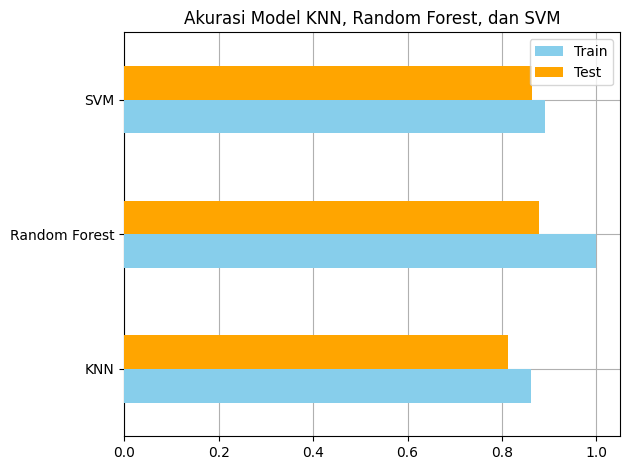

In [62]:
# Evaluasi akurasi
acc = pd.DataFrame(index=['KNN', 'Random Forest', 'SVM'], columns=['Train', 'Test'])
acc.loc['KNN'] = [accuracy_score(y_train, knn.predict(X_train)),
                  accuracy_score(y_test, knn.predict(X_test))]

acc.loc['Random Forest'] = [accuracy_score(y_train, rf.predict(X_train)),
                            accuracy_score(y_test, rf.predict(X_test))]

acc.loc['SVM'] = [accuracy_score(y_train, svm.predict(X_train)),
                  accuracy_score(y_test, svm.predict(X_test))]

# Visualisasi akurasi
fig, ax = plt.subplots()
acc.plot(kind='barh', ax=ax, zorder=3, color=['skyblue', 'orange'])
ax.set_title("Akurasi Model KNN, Random Forest, dan SVM")
ax.grid(zorder=0)
plt.tight_layout()
plt.show()


In [63]:
# Prediksi 5 sampel pertama
prediksi = X_test.iloc[:5].copy()
pred_dict = {
    'y_true': y_test.iloc[:5].values,
    'prediksi_KNN': knn.predict(prediksi),
    'prediksi_RF': rf.predict(prediksi),
    'prediksi_SVM': svm.predict(prediksi)
}

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_SVM
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,1,0,0
4,1,0,1,1


Dari tabel di atas, terlihat bahwa setiap model baik itu K-Nearest Neighbor (KNN), Random Forest (RF), dan Support Vector Machine (SVM) memberikan hasil prediksi yang bervariasi terhadap nilai aktual (y_true). Pada sampel pertama hingga ketiga, seluruh model berhasil memprediksi dengan benar. Namun, pada sampel keempat, hanya Random Forest dan SVM yang memberikan prediksi yang sesuai, sementara KNN salah memprediksi kelas menjadi 1. Pada sampel kelima, hanya KNN yang salah memprediksi kelas aktual 1 sebagai 0, sedangkan RF dan SVM kembali konsisten memberikan hasil yang tepat.

Secara umum, dari lima sampel ini, Random Forest dan SVM menunjukkan prediksi yang lebih konsisten dan akurat dibandingkan KNN, yang tercatat dua kali salah memprediksi. Meskipun jumlah sampel terbatas, pola ini mengindikasikan bahwa Random Forest dan SVM mungkin lebih andal dalam menangkap pola data aktual pada kasus ini. Namun, evaluasi yang lebih menyeluruh tetap diperlukan menggunakan dataset yang lebih besar agar kesimpulan lebih akurat.